<a href="https://www.kaggle.com/code/erenefeorhan/ml-ipynb?scriptVersionId=197329239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


2. Veri Setinin Yüklenmesi


In [2]:
# Veri setinin yüklenmesi
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

# İlk birkaç satırın görüntülenmesi
df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


3. Keşifsel Veri Analizi (EDA)

Bu adımda, veri setimizin genel özelliklerini inceleyeceğiz. Veri setinde eksik değer olup olmadığını kontrol edeceğiz, sayısal ve kategorik değişkenlerin dağılımlarını inceleyip, hedef değişken (fraud) ile olan ilişkilerini görselleştireceğiz.


In [3]:
print(df.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


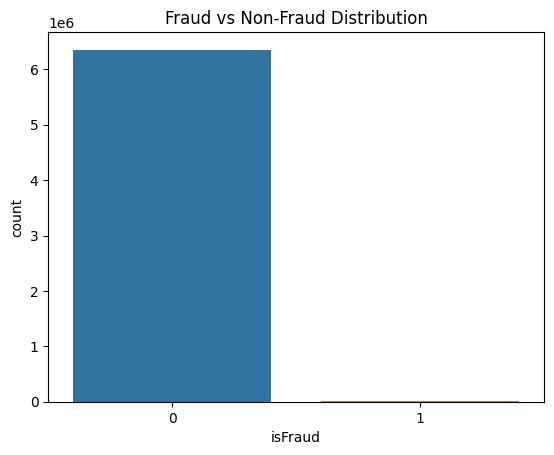

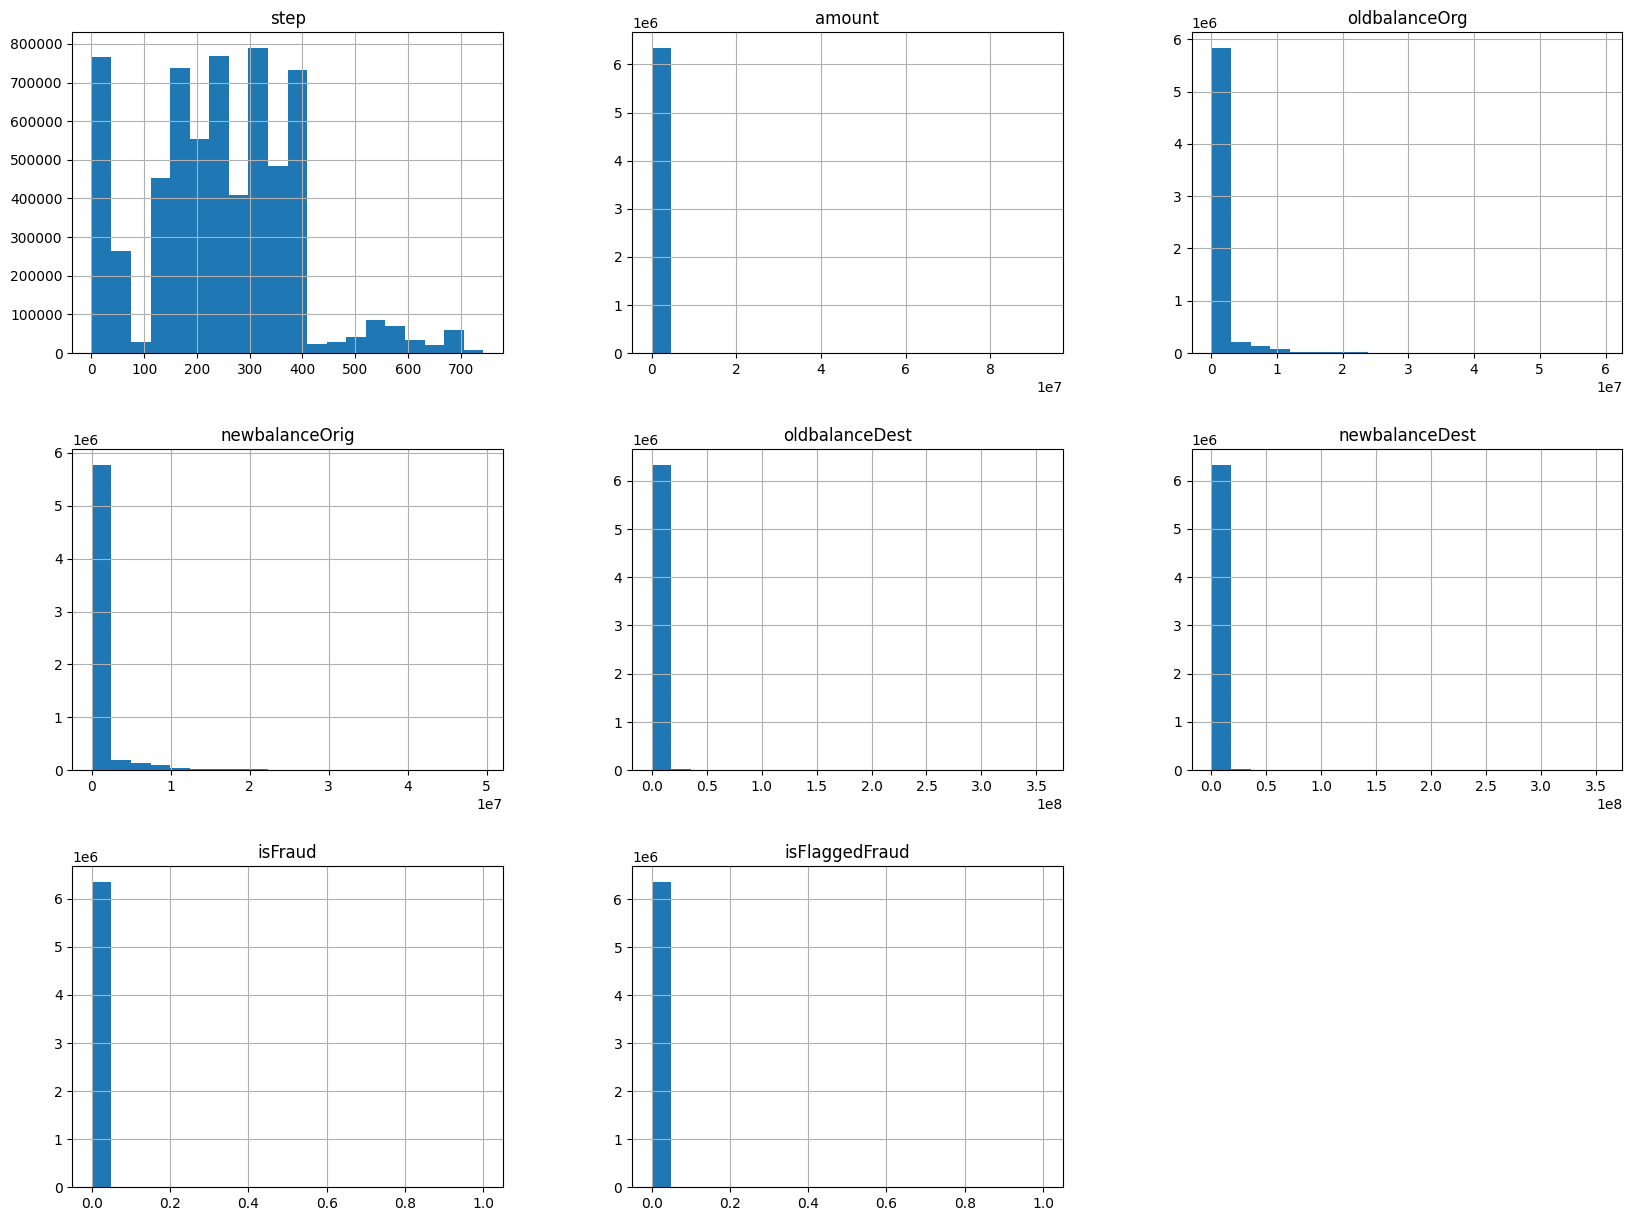

In [4]:
# Veri setinin genel bilgileri
df.info()

# Eksik verilerin kontrolü
df.isnull().sum()

# Veri setindeki hedef değişkenin dağılımı (Doğru sütun adı isFraud)
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

# Sayısal değişkenlerin dağılımı
df.hist(bins=20, figsize=(20, 15))
plt.show()


4. Veri Ön İşleme

Veri setini makine öğrenmesi algoritmalarına uygun hale getirmek için aşağıdaki veri ön işleme adımları uygulandı:

1. Sütunların Çıkarılması

Veri setinde model için anlamlı olmayan veya gereksiz olan sütunlar çıkarıldı. Bu adımda özellikle 'nameOrig' ve 'nameDest' sütunları çıkarıldı, çünkü bu sütunlar işlemin kaynağı ve hedefi ile ilgili kimlik bilgilerini içeriyor ve modelin öğrenmesi için faydalı değiller.

2.Verilerin Ölçeklendirilmesi

Makine öğrenmesi modelleri, özellikle regresyon gibi modeller, farklı ölçeklerdeki verilerle çalışırken zorlanabilir. Bu yüzden, veriler StandardScaler ile aynı ölçeğe getirildi. Bu işlem, modelin daha hızlı ve tutarlı öğrenmesine katkı sağlar.



In [5]:
# 'nameOrig' ve 'nameDest' sütunlarının çıkarılması
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Kategorik değişken olan 'type' sütununu one-hot encoding ile sayısal değerlere çevirme
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Girdi ve hedef değişkenlerin ayrılması
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Verinin eğitim ve test setlerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. Gözetimli Öğrenme - Lojistik Regresyon ile Dolandırıcılık Tespiti

Veri setimizin hedefi olan dolandırıcılığı tespit etmek için Lojistik Regresyon modelini kullanacağız. İlk adımda verimizi eğitim ve test kümelerine ayıracağız, ardından modeli eğitip sonuçları değerlendireceğiz.



In [6]:
# Lojistik Regresyon modelinin oluşturulması
lr_model = LogisticRegression(max_iter=500, class_weight='balanced')

# Modelin eğitilmesi
lr_model.fit(X_train, y_train)

# Modelin test seti ile tahminlerde bulunması
y_pred = lr_model.predict(X_test)

# Model değerlendirme - Confusion Matrix ve Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1210101   60803]
 [     37    1583]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270904
           1       0.03      0.98      0.05      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



6. Gözetimsiz Öğrenme - KMeans ile Müşteri Kümeleri

Bu adımda, müşteri segmentlerini belirlemek için KMeans algoritmasını kullanacağız. Veriyi 2 boyuta indirgedikten sonra kümeleme yaparak sonuçları görselleştireceğiz.





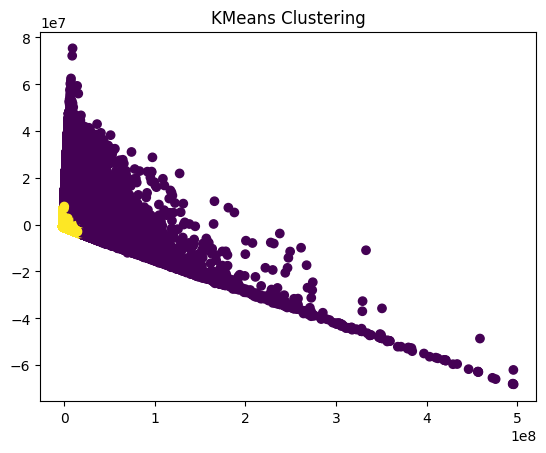

In [7]:
# PCA ile boyut indirgeme (2 bileşene)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# KMeans kümeleme (n_init'i manuel olarak ayarlıyoruz)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_pca)


# Kümeleme sonuçlarının görselleştirilmesi
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()


7. Model Optimizasyonu - GridSearchCV ile Hiperparametre Optimizasyonu

Bu bölümde, bir Karar Ağaçları modeli oluşturulmuş, hiperparametre optimizasyonu GridSearchCV ile gerçekleştirilmiş ve modelin performansı çapraz doğrulama ile değerlendirilmiştir.



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Karar Ağaçları modeli
dt_model = DecisionTreeClassifier()

# Hiperparametre ızgarası
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# GridSearch ile en iyi parametrelerin bulunması
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("Best Parameters:", grid_search.best_params_)

# En iyi model ile çapraz doğrulama skorlarını hesaplayın
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama skorlarının özetini yazdırın
print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", cv_scores.mean())
print("Standard Deviation of CV Scores: ", cv_scores.std())

# En iyi model ile tahminlerde bulunma
y_pred_best = grid_search.predict(X_test)

# Sonuçların değerlendirilmesi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': 7, 'min_samples_split': 10}
Cross-Validation Scores:  [0.99956582 0.99955011 0.99957565 0.99957565 0.99956582]
Mean CV Score:  0.9995666093529053
Standard Deviation of CV Scores:  9.34785549619546e-06
Confusion Matrix:
 [[1270786     118]
 [    456    1164]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.72      0.80      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.86      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

